In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import traceback
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import shutil
from LogClass import LogObj
from ConnMySQLDB import MySQLDB
from Voice_Dectection_Utils import VoiceDetectionUtils

In [2]:
# init
logFile = LogObj('.','logFile')
mySQLDB = MySQLDB(logFile)
utils = VoiceDetectionUtils(logFile)

# Extract Data

In [3]:
ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 20:39:00' and rec_datetime <= '2019-07-19 20:56:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-20 16:31:30' and rec_datetime <= '2019-07-20 16:49:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 11:28:30' and rec_datetime <= '2019-07-21 11:40:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:14:00' and rec_datetime <= '2019-07-22 22:23:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 15:19:00' and rec_datetime <= '2019-07-23 15:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 16:23:00' and rec_datetime <= '2019-07-23 17:02:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-23 20:38:30' and rec_datetime <= '2019-07-22 20:42:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 22:49:00' and rec_datetime <= '2019-07-23 23:03:30';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 03:14:30' and rec_datetime <= '2019-07-24 03:22:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:38:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 06:39:00' and rec_datetime <= '2019-07-24 06:43:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 16:37:00' and rec_datetime <= '2019-07-24 17:15:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-25 14:43:30' and rec_datetime <= '2019-07-25 14:48:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 16:56:30' and rec_datetime <= '2019-07-26 17:17:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 11:50:30' and rec_datetime <= '2019-07-27 12:19:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:07:30' and rec_datetime <= '2019-07-28 16:25:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-05 16:29:30' and rec_datetime <= '2019-08-05 16:34:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:28:30' and rec_datetime <= '2019-08-07 21:33:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 22:06:30' and rec_datetime <= '2019-08-07 22:16:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-09 02:26:00' and rec_datetime <= '2019-08-09 02:33:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:05:30' and rec_datetime <= '2019-08-14 06:26:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:38:30' and rec_datetime <= '2019-08-14 06:46:30';"];

NormalSQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 21:02:30' and rec_datetime <= '2019-07-19 21:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:18:30' and rec_datetime <= '2019-07-19 22:32:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:53:00' and rec_datetime <= '2019-07-19 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 12:00:00' and rec_datetime <= '2019-07-21 12:09:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:35:30' and rec_datetime <= '2019-07-22 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 17:13:00' and rec_datetime <= '2019-07-23 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 03:26:30' and rec_datetime <= '2019-07-24 03:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:43:00' and rec_datetime <= '2019-07-24 05:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 17:29:30' and rec_datetime <= '2019-07-24 18:05:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 18:12:00' and rec_datetime <= '2019-07-24 18:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 17:36:30' and rec_datetime <= '2019-07-26 18:29:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 13:07:00' and rec_datetime <= '2019-07-27 13:20:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:43:00' and rec_datetime <= '2019-07-28 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-31 11:21:00' and rec_datetime <= '2019-07-31 12:02:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:42:00' and rec_datetime <= '2019-08-07 21:59:30';"];

In [4]:
#抓取異常資料
OutputErrRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)

#轉換資料格式
OutputErrTrans = utils.transRawData(OutputErrRaw)

#抓取正常資料
OutputNormalRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',NormalSQL)

#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)

# EDA

In [108]:
#正規化採minmax
#'./kmeans_model/20190909normal', 'normalModel'
def NormalizeErrData(processMthd, errData, normalData, isSave, savePath, modelName):
    
    outputErrTransNormal=""
    outputNormalTransNormal =""
    
    #ERRDATA作正規化
    if len(errData)>0:
        err = errData.values #returns a numpy array
        #errScaled = processMthd.fit_transform(err)
        tempModel = processMthd.fit(err)
        errScaled = processMthd.transform(err)
        outputErrTransNormal = pd.DataFrame(errScaled)
        if isSave:
            if not os.path.isdir(savePath):
                os.mkdir(savePath)

            saveModel(savePath, modelName, tempModel)

    #NORMALDATA作正規化
    if len(normalData)>0:
        normal = normalData.values #returns a numpy array
        #tempModel = processMthd.fit(normal)
        normalScaled= processMthd.transform(normal)
        #normalScaled = processMthd.fit_transform(normal)
        outputNormalTransNormal = pd.DataFrame(normalScaled)
        
    return outputErrTransNormal , outputNormalTransNormal


#得到重要特徵，變異數小且正常和異常資料間平均相差大的
def GetMajorVar(errData, normalData, isFilterMeanSTD, avgdiff, isShowImportVar):
    
    outputErrTransNormalSTD = pd.DataFrame(errData.std(), columns=["std_e"])
    
    outputNormalTransNormalSTD = pd.DataFrame(normalData.std(), columns=["std_n"])
    
    #篩選變異數夠小的
    if isFilterMeanSTD:
        outputErrTransNormalFilterSTD=[outputErrTransNormalSTD["std_e"] < np.mean(outputErrTransNormalSTD["std_e"])]
        outputNormalTransNormalFilterSTD=[outputNormalTransNormalSTD["std_n"] < np.mean(outputNormalTransNormalSTD["std_n"])]
    else:
        outputErrTransNormalFilterSTD = outputErrTransNormalSTD
        outputNormalTransNormalFilterSTD = outputNormalTransNormalSTD
        
    outputTransNormalSTD = pd.merge(outputErrTransNormalFilterSTD, outputNormalTransNormalFilterSTD, left_index=True, right_index=True)

    #篩選平均值差距夠大的
    outputErrTransNormalAVG = pd.DataFrame(errData.mean(), columns=["avg_e"])
    outputNormalTransNormalAVG = pd.DataFrame(normalData.mean(), columns=["avg_n"])
    outputAVGDiff = pd.DataFrame((outputNormalTransNormalAVG["avg_n"] - outputErrTransNormalAVG["avg_e"]).abs(), columns=['avg'])
    outputTransNormalAVG = outputAVGDiff[outputAVGDiff["avg"] > avgdiff]
    
    majorVarOutputTransNormal = pd.merge(outputTransNormalSTD, outputTransNormalAVG, left_index=True, right_index=True)
    
    
    if isShowImportVar:
        plt.figure(figsize=(18, 3))
        plt.plot(outputErrTransNormalSTD.index, outputErrTransNormalSTD.values, marker='', color="skyblue", linewidth=1, alpha=0.9)
        for i in majorVarOutputTransNormal.index.values:
            plt.axvline(i, color="r")
        plt.title("NG Data std")   
            
        plt.figure(figsize=(18, 3))
        plt.plot(outputNormalTransNormalSTD.index, outputNormalTransNormalSTD.values, marker='', color="skyblue", linewidth=1, alpha=0.9)
        plt.title("Normal Data std")
        for i in majorVarOutputTransNormal.index.values:
            plt.axvline(i, color="r")
        plt.show()
    
    return majorVarOutputTransNormal.index.values


#組成想要的表格樣式
def combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, ErrIndex, normalNums, errNums, NcorrectRate, EcorrectRate):
    ErrCount={"N_Err":N_ErrArr,"E_Err":E_ErrArr,"T_Err":T_ErrArr}
    df = pd.DataFrame(data=ErrCount)
    df = df.set_index(pd.Index(ErrIndex))
    #print("正常資料個數："+ str(normalNums) +",異常資料個數："+ str(errNums))
    df["N_Err_%"] = df["N_Err"]/normalNums
    df["E_Err_%"] = df["E_Err"]/errNums
    df["T_Err_%"] = df["T_Err"]/(normalNums+errNums)
    df = df.round(3)

    #只取出T_Err % 及E_Err_%小於 1-0.8 (即正確率大於80%)
    df = df[df["E_Err_%"] < (1-EcorrectRate)]
    df = df[df["N_Err_%"] < (1-NcorrectRate)]

    #df.index.values
    df = df.sort_values(by='E_Err', ascending=True)
    return df

In [92]:

#正規化正常資料及異常資料
min_max_scaler = preprocessing.MinMaxScaler()
OutputErrTransNormal , OutputNormalTransNormal  = NormalizeData(min_max_scaler, OutputErrTrans,OutputNormalTrans, False)

#獲得主要特徵
MajorVarIndex = GetMajorVar(OutputErrTransNormal , OutputNormalTransNormal, False ,0.02, False)

len(MajorVarIndex)


68

## 建模

In [11]:
def KMeansModelPC(majorVarIndex, errData, normalData, isSaveTransData):
    
    outlierIndex = list()
    N_ErrArr=list()
    E_ErrArr=list()
    T_ErrArr=list()
    #band分到正確時對應的index是什麼
    CorrToIndex = dict()
    KMeansModeTransDataSet= dict()
    KMeansModelSet = dict()
    
    for i in majorVarIndex:
        #prepare data format
        outputNormalTransType = normalData.loc[:,[i]]
        
        #刪除值為0或 >0.98
        outputNormalTransType = outputNormalTransType[(outputNormalTransType.loc[:,i]!=0)&(outputNormalTransType.loc[:,i]<=0.98)]
        outputNormalTransType["dataType"] = "n"
        
        outputErrTransType = errData.loc[:,[i]]
        #刪除值為0或1
        outputErrTransType = outputErrTransType[(outputErrTransType.loc[:,i]!=0)&(outputErrTransType.loc[:,i]<=0.98)]
        outputErrTransType["dataType"] = "e"

        outputTransKmeans = outputNormalTransType.append(outputErrTransType, ignore_index=True)

        # k-means
        kmeans = KMeans(n_clusters=2).fit(outputTransKmeans[[i]])
        #centroids = kmeans.cluster_centers_
        KMeansModelSet[i]=kmeans
        outputTransKmeans["label"] = kmeans.labels_

        num_N_1 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="n") & (outputTransKmeans["label"]==1)])
        num_N_0 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="n") & (outputTransKmeans["label"]==0)])
        num_E_1 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="e") & (outputTransKmeans["label"]==1)])
        num_E_0 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="e") & (outputTransKmeans["label"]==0)])
        
        # tell whether distinquish or not
        tempLable=1
        
        if num_N_1 < num_N_0:
            N_Err =num_N_1
            tempLable=0
        else:
            N_Err =num_N_0
            tempLable=1
        
        #分到錯誤的index,比較多的代表分到NG Data區
        if num_E_1 < num_E_0:
            E_Err = num_E_1
            CorrToIndex[i]=0
            
            if tempLable == 0:
                #代表normal 和 error分到同一邊
                outlierIndex.append(i)
                
        else:
            E_Err = num_E_0
            CorrToIndex[i]=1
            if tempLable == 1:
                #代表normal 和 error分到同一邊
                outlierIndex.append(i)

        N_ErrArr.append(N_Err)
        E_ErrArr.append(E_Err)
        T_ErrArr.append(N_Err+E_Err)
        
        if isSaveTransData:
            KMeansModeTransDataSet[i]=outputTransKmeans
    
    return N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex


#得到 (N_Err-E_Err)數值大於平均數之特徵
def filterMajorVarIndex(df):
    compareIndex = list()
    threshold = (sum(df.loc[:,"N_Err"]) - sum(df.loc[:,"E_Err"]))/len(df)
    for index, row in df.iterrows():
        if row["N_Err"]-row["E_Err"]>threshold:
            compareIndex.append(index)
    return compareIndex


#得到拆分完後資料
def GetFilterData(totalPredictOutputDF):
    outputErrTransNormal = OutputErrTransNormal.loc[totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="e") & (totalPredictOutputDF[0]==True)].index.values]

    errPredictOutputDFindex = totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="n")].reset_index()
    outputNormalTransNormal = OutputNormalTransNormal.loc[errPredictOutputDFindex[(errPredictOutputDFindex[0]==True)].index.values]
    return outputErrTransNormal, outputNormalTransNormal


# refData

In [12]:
#針對NG資料
def modelEvaluate(outputErrTransNormal , outputNormalTransNormal, majorIndexArr, KMeansModelSet, corrToIndex, correctThreshold):
    #正規化異常資料
    
    outputNormalTransNormal["dataType"] = "n"
    outputErrTransNormal["dataType"] = "e"
    
    totalErrTransNormal = outputErrTransNormal.append(outputNormalTransNormal, ignore_index=True)
    
    #預測error data
    predictOutput=dict()
    for i in majorIndexArr:    
        corrIndex=corrToIndex[i]
        outputErrTransType = totalErrTransNormal.loc[:,[i]]
        kmodel = KMeansModelSet[i]
        predictOutput[i]= (kmodel.predict(outputErrTransType)==corrIndex)


    #print(pd.DataFrame(predictOutput))
    dfIndex = len(majorIndexArr)
    errRowLen = totalErrTransNormal.shape[0]
    predictOutputDF =pd.DataFrame(predictOutput)
    totalPredictOutputDF = pd.DataFrame(predictOutputDF.sum(axis=1)/dfIndex >= correctThreshold)
    totalPredictOutputDF["dataType"] = totalErrTransNormal["dataType"]
    #print(totalPredictOutputDF)
    num_N_1 = len(totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="n") & (totalPredictOutputDF[0]==True)])
    num_N_0 = len(totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="n") & (totalPredictOutputDF[0]==False)])
    num_E_1 = len(totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="e") & (totalPredictOutputDF[0]==True)])
    num_E_0 = len(totalPredictOutputDF[(totalPredictOutputDF["dataType"]=="e") & (totalPredictOutputDF[0]==False)])
    
    '''
    print(num_N_1, num_N_0, num_E_1, num_E_0)
    N_Err =num_N_1
    E_Err =num_E_0

    norPredictOutput = (num_N_0)/len(outputNormalTransNormal)
    errPredictOutput = (num_E_1)/len(outputErrTransNormal)
    totalPredictOutput = (num_E_1+num_N_0)/errRowLen
    '''
    
    return num_N_1, num_N_0, num_E_1, num_E_0, totalPredictOutputDF


def modelCreatePipeLine(OutputErrTransNormal , OutputNormalTransNormal, iterTimes,isSaveModel,savePath):
    
    totalPredictOutputDF=pd.DataFrame()
    modelInfo = dict()
    modelInfo["numConclude"]=[]
    modelInfo["modelSet"]=[]
    errCount=0
    normalCount=0
    
    for i in range(iterTimes):
        
        if i==0:
            outputErrTransNormal, outputNormalTransNormal = OutputErrTransNormal , OutputNormalTransNormal
        else:
            #獲取第i輪切分完資料
            if (~totalPredictOutputDF.empty):
                outputErrTransNormal, outputNormalTransNormal = GetFilterData(totalPredictOutputDF)
        
        #第i次獲取主要特徵
        MajorVarIndex = GetMajorVar(outputErrTransNormal , outputNormalTransNormal, False ,0.01, False)
    
        N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex = KMeansModelPC(
        MajorVarIndex, outputErrTransNormal , outputNormalTransNormal, True)
    
        normalNums = len(outputNormalTransNormal)
        errNums = len(outputErrTransNormal)
        df = combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, CorrToIndex.keys(), normalNums, errNums, 0.0, 0.8)
        MajorIndexArr=filterMajorVarIndex(df)
    
        #第i次分群結果
        num_N_1, num_N_0, num_E_1, num_E_0, totalPredictOutputDF = modelEvaluate(
            outputErrTransNormal ,outputNormalTransNormal , MajorIndexArr, KMeansModelSet, CorrToIndex, 0.7)
        
        modelInfo["numConclude"].append((num_N_1, num_N_0, num_E_1, num_E_0))
        modelInfo["modelSet"].append((MajorIndexArr, KMeansModelSet, CorrToIndex))
        normalCount=normalCount+num_N_0
        errCount=num_E_1
        
        if isSaveModel:
            if not os.path.isdir(savePath):
                os.mkdir(savePath)
                
            if os.path.isdir(savePath) and (i==0):
                shutil.rmtree(savePath)
                os.mkdir(savePath)
 
            for j in MajorIndexArr:
                kmeans=KMeansModelSet[j]
                fileName = ('KMeans_%s_%s_%s'%(i,j,CorrToIndex[j])) 
                saveModel(savePath, fileName, kmeans)
            
    print("分到NG DATA機率："+str(round(errCount/len(OutputErrTransNormal),2)))
    print("分到Normal DATA機率："+str(round((normalCount/len(OutputNormalTransNormal)),2)))
    return modelInfo 

In [116]:

min_max_scaler = preprocessing.MinMaxScaler()
OutputErrTransNormal , OutputNormalTransNormal  = NormalizeData(min_max_scaler, OutputErrTrans,OutputNormalTrans, False)
modelInfo = modelCreatePipeLine(OutputErrTransNormal , OutputNormalTransNormal,2, False, './kmeans_model/20190909')


分到NG DATA機率：0.61
分到Normal DATA機率：0.71


In [22]:
def refModel(data, modelInfo, correctThreshold):
    if len(data)==1:
        for majorIndexArr, KMeansModelSet, corrToIndex in modelInfo["modelSet"]:
            #預測error data
            predictOutput=dict()
            for i in majorIndexArr:
                corrIndex=corrToIndex[i]
                dataTemp = data.loc[:,[i]]
                kmodel = KMeansModelSet[i]
                predictOutput[i]= (kmodel.predict(dataTemp)==corrIndex)

            dfIndex = len(majorIndexArr)
            predictOutputDF =pd.DataFrame(predictOutput)
            totalPredictOutputDF = pd.DataFrame(predictOutputDF.sum(axis=1)/dfIndex >= correctThreshold)

            if totalPredictOutputDF.iloc[0,0]==False:
                return False
            
        return True
    

def loadKMeansModel(savePath):
    modelInfo = dict()
    modelInfo["modelSet"]=[]
    modelConclude=dict()

    for fileName in os.listdir(savePath):
        temp = fileName.split("_")
        if temp[1] in modelConclude:
            modelConclude[temp[1]].append(fileName)
        else:
            modelConclude[temp[1]]=[fileName]

    modelConclude =  dict(sorted(modelConclude.items(), key=lambda d: d[0]))

    for item in modelConclude:
        CorrToIndex=dict()
        KMeansModelSet=dict()
        MajorIndexArr=list()
        for fileName in modelConclude[item]:
            temp = fileName.split("_")
            varsName = int(temp[2])
            MajorIndexArr.append(varsName)
            KMeansModelSet[varsName] = loadModel(savePath, fileName)
            CorrToIndex[varsName] =int(temp[3].split('.')[0])
        modelInfo["modelSet"].append((MajorIndexArr, KMeansModelSet, CorrToIndex))
    
    return modelInfo

In [81]:
datatemp = pd.DataFrame(OutputNormalTransNormal.iloc[0,:]).T
modelInfo = loadKMeansModel('./kmeans_model/20190909')
refModel(datatemp, modelInfo, 0.9)

True

## TEST

In [19]:
ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 21:02:30' and rec_datetime <= '2019-07-19 21:59:30';"];
    #"select * from t_device41 where rec_datetime >= '2019-07-19 20:39:00' and rec_datetime <= '2019-07-19 20:56:00';",];

#抓取異常資料
temp = mySQLDB.ExtractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)

#轉換資料格式
temp = transRawData(temp)
    
normal = loadModel('./kmeans_model/20190909normal','normalModel.pickle')
outTemp = normal.transform(temp)
outTemp = pd.DataFrame(outTemp)

In [23]:
consult=list()

#min_max_scaler = preprocessing.MinMaxScaler()
#OutputErrTransNormal , OutputNormalTransNormal  = NormalizeData(min_max_scaler, OutputErrTrans,"")
modelInfo = loadKMeansModel('./kmeans_model/20190909')

for i in range(len(outTemp)):
    datatemp = pd.DataFrame(outTemp.iloc[i,:]).T
    consult.append(refModel(datatemp, modelInfo, 0.9))

# 繪圖

In [3]:
#繪製折線圖
def DrawExtractDataLine(title, data, startcCols, endCols, isShowImportVar, importVarsArr):
    
    if title == None:
        title=""
    
    if startcCols==None:
        startcCols = 0
    
    if endCols==None:
        endCols = len(data.columns)
    
    plt.figure(figsize=(18, 5))

    # create a color palette
    #palette = plt.cm.get_cmap('Greys')

    # multiple line plot
    for i in range(len(data)):
        plt.plot(data.columns[startcCols:endCols], data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    
    #加上重要特徵
    if isShowImportVar & (len(importVarsArr)!= 0):
        for varId in importVarsArr:
            plt.axvline(varId, 0, 1, color="r")
    
    plt.title(title)
    #plt.legend(loc='best')

    plt.show()
    

#儲存excel
def SaveExcel(file_path , data):
    # create and writer pd.DataFrame to excel
    writer = pd.ExcelWriter(file_path)
    data.to_excel(writer,float_format='%.6f',encoding='utf-8',sheet_name='Sheet') # float_format 控制精度
    writer.save()
    writer.close()

In [20]:
"""
outputNormalTransNormal=OutputNormalTransNormal
outputErrTransNormal=OutputErrTransNormal

MajorVarIndex
"""


array([16, 17, 24, 25, 28, 29, 30, 33, 35, 36, 37, 38, 49, 54, 55, 58, 66,
       67, 68, 72], dtype=int64)

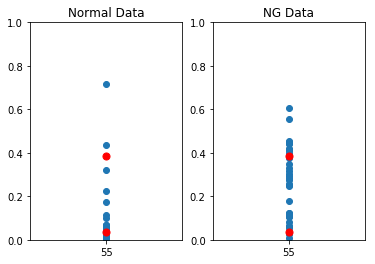

In [24]:
"""

#繪出kmeans結果
tempIndex =55
#正常資料個數
normalNums = len(outputNormalTransNormal)
#異常資料個數
errNums = len(outputErrTransNormal)

data = KMeansModeTransDataSet[tempIndex]
varId = tempIndex
kmodel = KMeansModelSet[tempIndex]

colName = str(data.columns[0])
data["xColName"] = colName
centroids = kmodel.cluster_centers_

plt.figure()
plt.subplot(1,2,1)

#plt.scatter(data["xColName"], data[varId], marker='o',c= kmodel.labels_.astype(float))
plt.scatter(data["xColName"][0:normalNums], data[varId][0:normalNums], marker='o')

plt.scatter([str(varId),str(varId)], centroids[:], c='red', s=50)
plt.ylim(0.0, 1.0)
plt.title("Normal Data")
plt.subplot(1,2,2)

plt.scatter(data["xColName"][normalNums:], data[varId][normalNums:], marker='o')
plt.scatter([str(varId), str(varId)], centroids[:], c='red', s=50)
plt.ylim(0.0, 1.0)
plt.title("NG Data")
plt.show()

#OutputTransKmeans = OutputTransKmeans.drop(["xColName"], axis=1)

"""



In [5]:
NormalSQL = ["select * from t_device41 where rec_datetime >= '2019-09-18 21:02:30' and rec_datetime <= '2019-09-18 21:59:30';"]

#抓取正常資料
temp = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',NormalSQL)


In [17]:
#轉換資料格式
tempNormalTrans = utils.transRawData(temp)

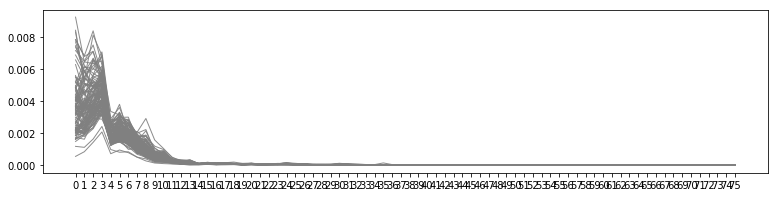

In [20]:
#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")
data = tempNormalTrans.iloc[:,0:76]

'''
#改變columns名稱
outputRenameCols = dict()
for item in data.columns:
    outputRenameCols[item]=str(item.split("_")[1]).strip()

data = data.rename(columns=outputRenameCols)
#按欄位排序
data = data[sorted(data.columns, key=lambda x: int(x))]
'''


startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    

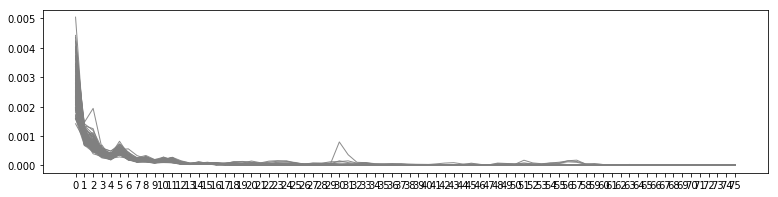

In [22]:
#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw
data = OutputNormalTrans.iloc[:,0:76]

'''
#改變columns名稱
outputRenameCols = dict()
for item in data.columns:
    outputRenameCols[item]=str(item.split("_")[1]).strip()

data = data.rename(columns=outputRenameCols)
#按欄位排序
data = data[sorted(data.columns, key=lambda x: int(x))]

'''

startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    

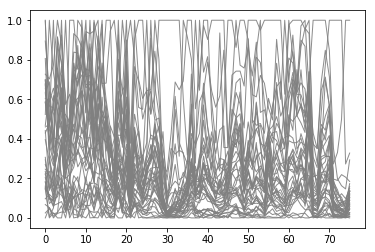

In [89]:
data = OutputErrTransNormal
startcCols = 0
endCols = len(data.columns)
for i in range(len(data)):
        plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    

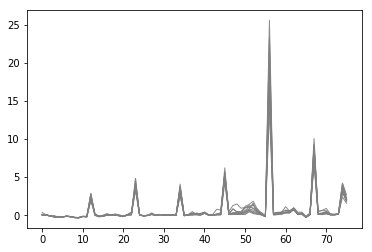

In [91]:
data = outTemp
startcCols = 0
endCols = len(data.columns)
for i in range(len(data)):
        plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    